# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [3]:
!pip install --upgrade ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 138 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 45.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 43.6 MB/s eta 0:00:01


In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:

# Define transformsn

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Create training set and define training dataloader
trainset = datasets.MNIST(root='data',download = True,train= True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

# Create test set and define test dataloader
testset =  datasets.MNIST(root='data',download = True,train= False,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=500, shuffle=True)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?
#I choose transforms.ToTensor() because it  converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1.

**DOUBLE CLICK THIS CELL TO MODIFY**


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


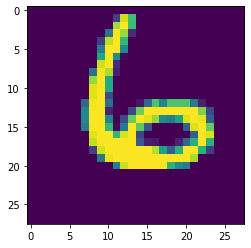

3


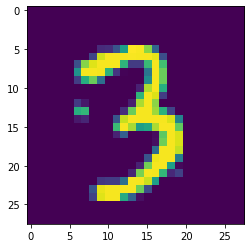

8


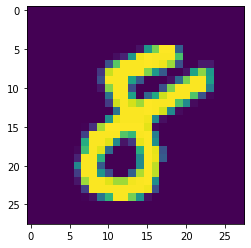

5


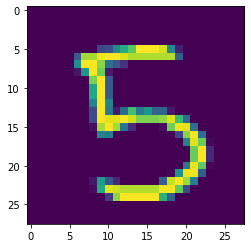

7


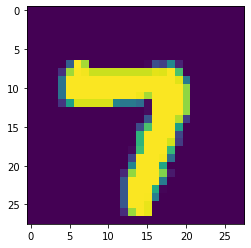

In [18]:
# Explore data
show5(trainloader)


In [4]:


# Explore data
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
class MultilayerPerceptron(nn.Module):
    def __init__(self,input_size=784, output_size=10, layers=[120, 84]):
        super().__init__()
        self.d1= nn.Linear(input_size ,layers[0])
        self.d2 =nn.Linear(layers[0],layers[1])
        self.d3= nn.Linear(layers[1],output_size)
    
    def forward(self,X):
        X= F.relu(self.d1(X))
        X=F.relu(self.d2(X))
        X=self.d3(X)
        return F.log_softmax(X, dim=1)

In [6]:
model = MultilayerPerceptron()
print(model)

MultilayerPerceptron(
  (d1): Linear(in_features=784, out_features=120, bias=True)
  (d2): Linear(in_features=120, out_features=84, bias=True)
  (d3): Linear(in_features=84, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(), lr=0.001)


In [8]:
for images, labels  in trainloader:
    print('Initial Batch shape: ', images.size())
    break
print('Batch shape after flattening :',images.view(100, -1).size())

Initial Batch shape:  torch.Size([100, 1, 28, 28])
Batch shape after flattening : torch.Size([100, 784])


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

Plot the training loss (and validation loss/accuracy, if recorded).

In [10]:

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    trn_loss = 0
    tst_loss = 0

    model.train()  # Set the model to training mode
    for b, (X_train, y_train) in enumerate(trainloader):
        optimizer.zero_grad()
        y_pred = model(X_train.view(X_train.size(0), -1))
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        trn_loss += loss.item()

        predicted = torch.max(y_pred, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        if b % 600 == 0 and b > 0:
            print(f'epoch: {i + 1:2}  batch: {b:4} [{b * trainloader.batch_size:6}/60000]  loss: {trn_loss / (b + 1):10.8f}  accuracy: {trn_corr.item() * 100 / (b * trainloader.batch_size):7.3f}%')

    train_losses.append(trn_loss / len(trainloader))
    train_correct.append(trn_corr)

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):
            y_val = model(X_test.view(X_test.size(0), -1))
            loss = criterion(y_val, y_test)
            tst_loss += loss.item()

            predicted = torch.max(y_val, 1)[1]
            tst_corr += (predicted == y_test).sum()

    test_losses.append(tst_loss / len(testloader))
    test_correct.append(tst_corr)

    print(f'Epoch {i + 1} - Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_correct[-1].item() * 100 / len(trainloader.dataset):.2f}%, Testing Loss: {test_losses[-1]:.4f}, Testing Accuracy: {test_correct[-1].item() * 100 / len(testloader.dataset):.2f}%')


Epoch 1 - Training Loss: 0.2075, Training Accuracy: 93.85%, Testing Loss: 0.1570, Testing Accuracy: 95.08%
Epoch 2 - Training Loss: 0.1512, Training Accuracy: 95.45%, Testing Loss: 0.1314, Testing Accuracy: 95.79%
Epoch 3 - Training Loss: 0.1215, Training Accuracy: 96.24%, Testing Loss: 0.1237, Testing Accuracy: 96.13%
Epoch 4 - Training Loss: 0.1034, Training Accuracy: 96.74%, Testing Loss: 0.1180, Testing Accuracy: 96.32%
Epoch 5 - Training Loss: 0.0878, Training Accuracy: 97.24%, Testing Loss: 0.0978, Testing Accuracy: 96.89%


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
print(f' Test accuracy : {test_correct[-1].item()*100/10000:3f}%')

 Test accuracy : 96.890000%


Text(0.5, 0, 'epochs')

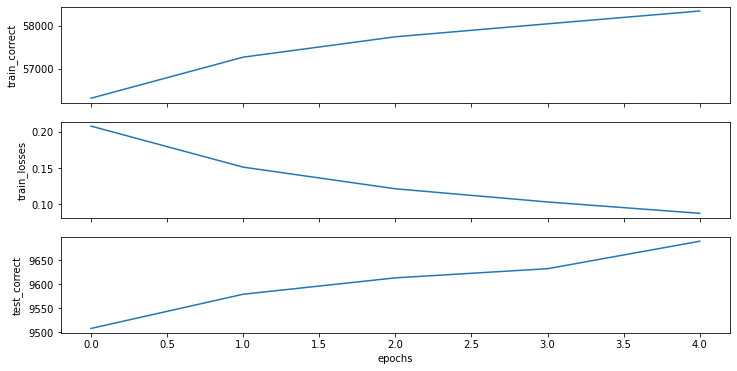

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 6), sharex=True)

ax1.plot(train_correct)
ax1.set_ylabel("train_correct")

ax2.plot(train_losses)
ax2.set_ylabel("train_losses")

ax3.plot(test_correct)
ax3.set_ylabel("test_correct")

ax3.set_xlabel("epochs")

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [15]:
#build the neural network
def neural_network():
    model = nn.Sequential(
        nn.Flatten(), #flatten layer to flatten input tensors
        nn.Linear(784, 128), #fully connected layer 1
        nn.ReLU(), #ReLU activation
        nn.Dropout(p=0.15),
        nn.Linear(128,64), #fully connected layer 2
        nn.ReLU(), #ReLU activation
        nn.Linear(64,10), #fully connected layer 3
        nn.LogSoftmax(dim=1)
    )
    return model

#instantiate the model
model = neural_network()
#set up loss function
loss_function=nn.NLLLoss()

#set up optimizer
optimizer=optim.SGD(model.parameters(), lr=0.05)



epochs = 15
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    trn_loss = 0
    tst_loss = 0

    model.train()  # Set the model to training mode
    for b, (X_train, y_train) in enumerate(trainloader):
        optimizer.zero_grad()
        y_pred = model(X_train.view(X_train.size(0), -1))
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        trn_loss += loss.item()

        predicted = torch.max(y_pred, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr

        if b % 600 == 0 and b > 0:
            print(f'epoch: {i + 1:2}  batch: {b:4} [{b * trainloader.batch_size:6}/60000]  loss: {trn_loss / (b + 1):10.8f}  accuracy: {trn_corr.item() * 100 / (b * trainloader.batch_size):7.3f}%')

    train_losses.append(trn_loss / len(trainloader))
    train_correct.append(trn_corr)

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(testloader):
            y_val = model(X_test.view(X_test.size(0), -1))
            loss = criterion(y_val, y_test)
            tst_loss += loss.item()

            predicted = torch.max(y_val, 1)[1]
            tst_corr += (predicted == y_test).sum()

    test_losses.append(tst_loss / len(testloader))
    test_correct.append(tst_corr)

    print(f'Epoch {i + 1} - Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_correct[-1].item() * 100 / len(trainloader.dataset):.2f}%, Testing Loss: {test_losses[-1]:.4f}, Testing Accuracy: {test_correct[-1].item() * 100 / len(testloader.dataset):.2f}%')





Epoch 1 - Training Loss: 0.6605, Training Accuracy: 80.17%, Testing Loss: 0.3018, Testing Accuracy: 91.18%
Epoch 2 - Training Loss: 0.2943, Training Accuracy: 91.05%, Testing Loss: 0.2033, Testing Accuracy: 93.92%
Epoch 3 - Training Loss: 0.2215, Training Accuracy: 93.42%, Testing Loss: 0.1761, Testing Accuracy: 95.02%
Epoch 4 - Training Loss: 0.1795, Training Accuracy: 94.64%, Testing Loss: 0.1393, Testing Accuracy: 95.84%
Epoch 5 - Training Loss: 0.1560, Training Accuracy: 95.34%, Testing Loss: 0.1344, Testing Accuracy: 95.83%
Epoch 6 - Training Loss: 0.1358, Training Accuracy: 95.92%, Testing Loss: 0.1387, Testing Accuracy: 95.91%
Epoch 7 - Training Loss: 0.1235, Training Accuracy: 96.31%, Testing Loss: 0.1109, Testing Accuracy: 96.67%
Epoch 8 - Training Loss: 0.1141, Training Accuracy: 96.50%, Testing Loss: 0.0957, Testing Accuracy: 97.09%
Epoch 9 - Training Loss: 0.1055, Training Accuracy: 96.78%, Testing Loss: 0.0963, Testing Accuracy: 96.98%
Epoch 10 - Training Loss: 0.0982, Tra

## Saving your model
Using `torch.save`, save your model for future loading.

In [16]:
torch.save(model, './my_mnist_model.pt') 